In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.colors as mcolors
import glob
import os

In [3]:
minutes_info = pd.read_excel("./data/raw/minutes_info.xlsx")
minutes_info['DataReferencia'] = pd.to_datetime(minutes_info['DataReferencia'])
minutes_info.set_index("Titulo", inplace=True)

df_results = pd.read_excel("./data/processed/lda_results.xlsx")
df_results["filename"] = df_results["filename"].str.replace(".txt", "")
df_results["date"] = df_results.filename.map(minutes_info['DataReferencia'])

df_results = df_results.sort_values("date")
df_results

,filename,original_text,dominant_topic,date
8103,42nd Copom minutes,board analyze recent evolution outlook brazili...,3,2000-01-10 02:00:00+00:00
8135,42nd Copom minutes,close meeting member remind committee meet jan...,1,2000-01-10 02:00:00+00:00
8134,42nd Copom minutes,give due consideration uncertainty regard beha...,0,2000-01-10 02:00:00+00:00
8133,42nd Copom minutes,confirm diagnosis regard inflation trend recen...,5,2000-01-10 02:00:00+00:00
8132,42nd Copom minutes,base analysis current data outlook copom opt a...,3,2000-01-10 02:00:00+00:00
...,...,...,...,...
8080,"271st Meeting - June 17-18, 2025",addition behavior volatility different asset c...,0,2025-06-18 03:00:00+00:00
8079,"271st Meeting - June 17-18, 2025",global environment remain adverse particularly...,0,2025-06-18 03:00:00+00:00
8102,"271st Meeting - June 17-18, 2025",following member committee vote decision gabri...,7,2025-06-18 03:00:00+00:00
8089,"271st Meeting - June 17-18, 2025",fiscal policy impact mainly stimulate aggregat...,3,2025-06-18 03:00:00+00:00


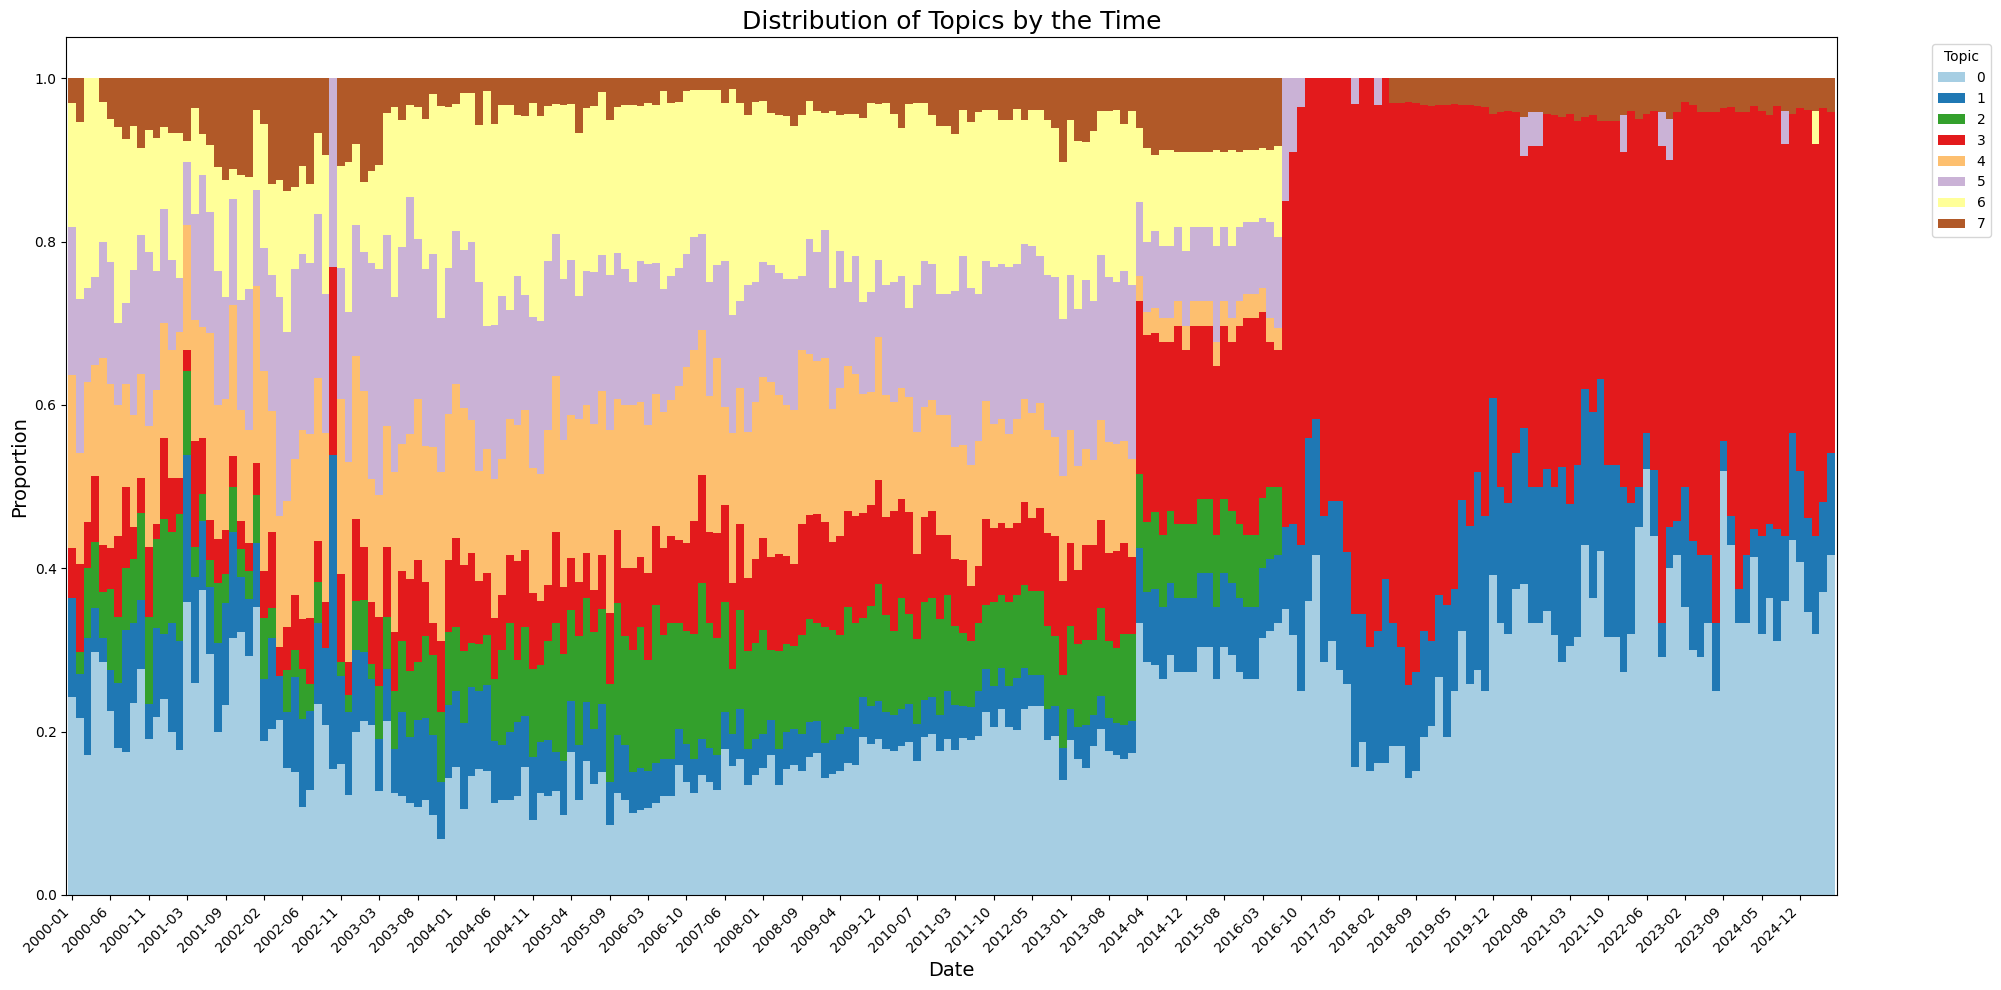

In [5]:
topic_counts_by_date = df_results.groupby(['date', 'dominant_topic']).size().unstack(fill_value=0)
topic_proportions_by_date = topic_counts_by_date.div(topic_counts_by_date.sum(axis=1), axis=0)
topic_proportions_by_date.index = topic_proportions_by_date.index.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(20, 10))
topic_proportions_by_date.plot(kind='bar', stacked=True, width=1.0, ax=ax, colormap='Paired')

n = 5 
ticks = ax.xaxis.get_ticklocs()[::n]
labels = ax.get_xticklabels()[::n]
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45, ha="right")

plt.title('Distribution of Topics by the Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


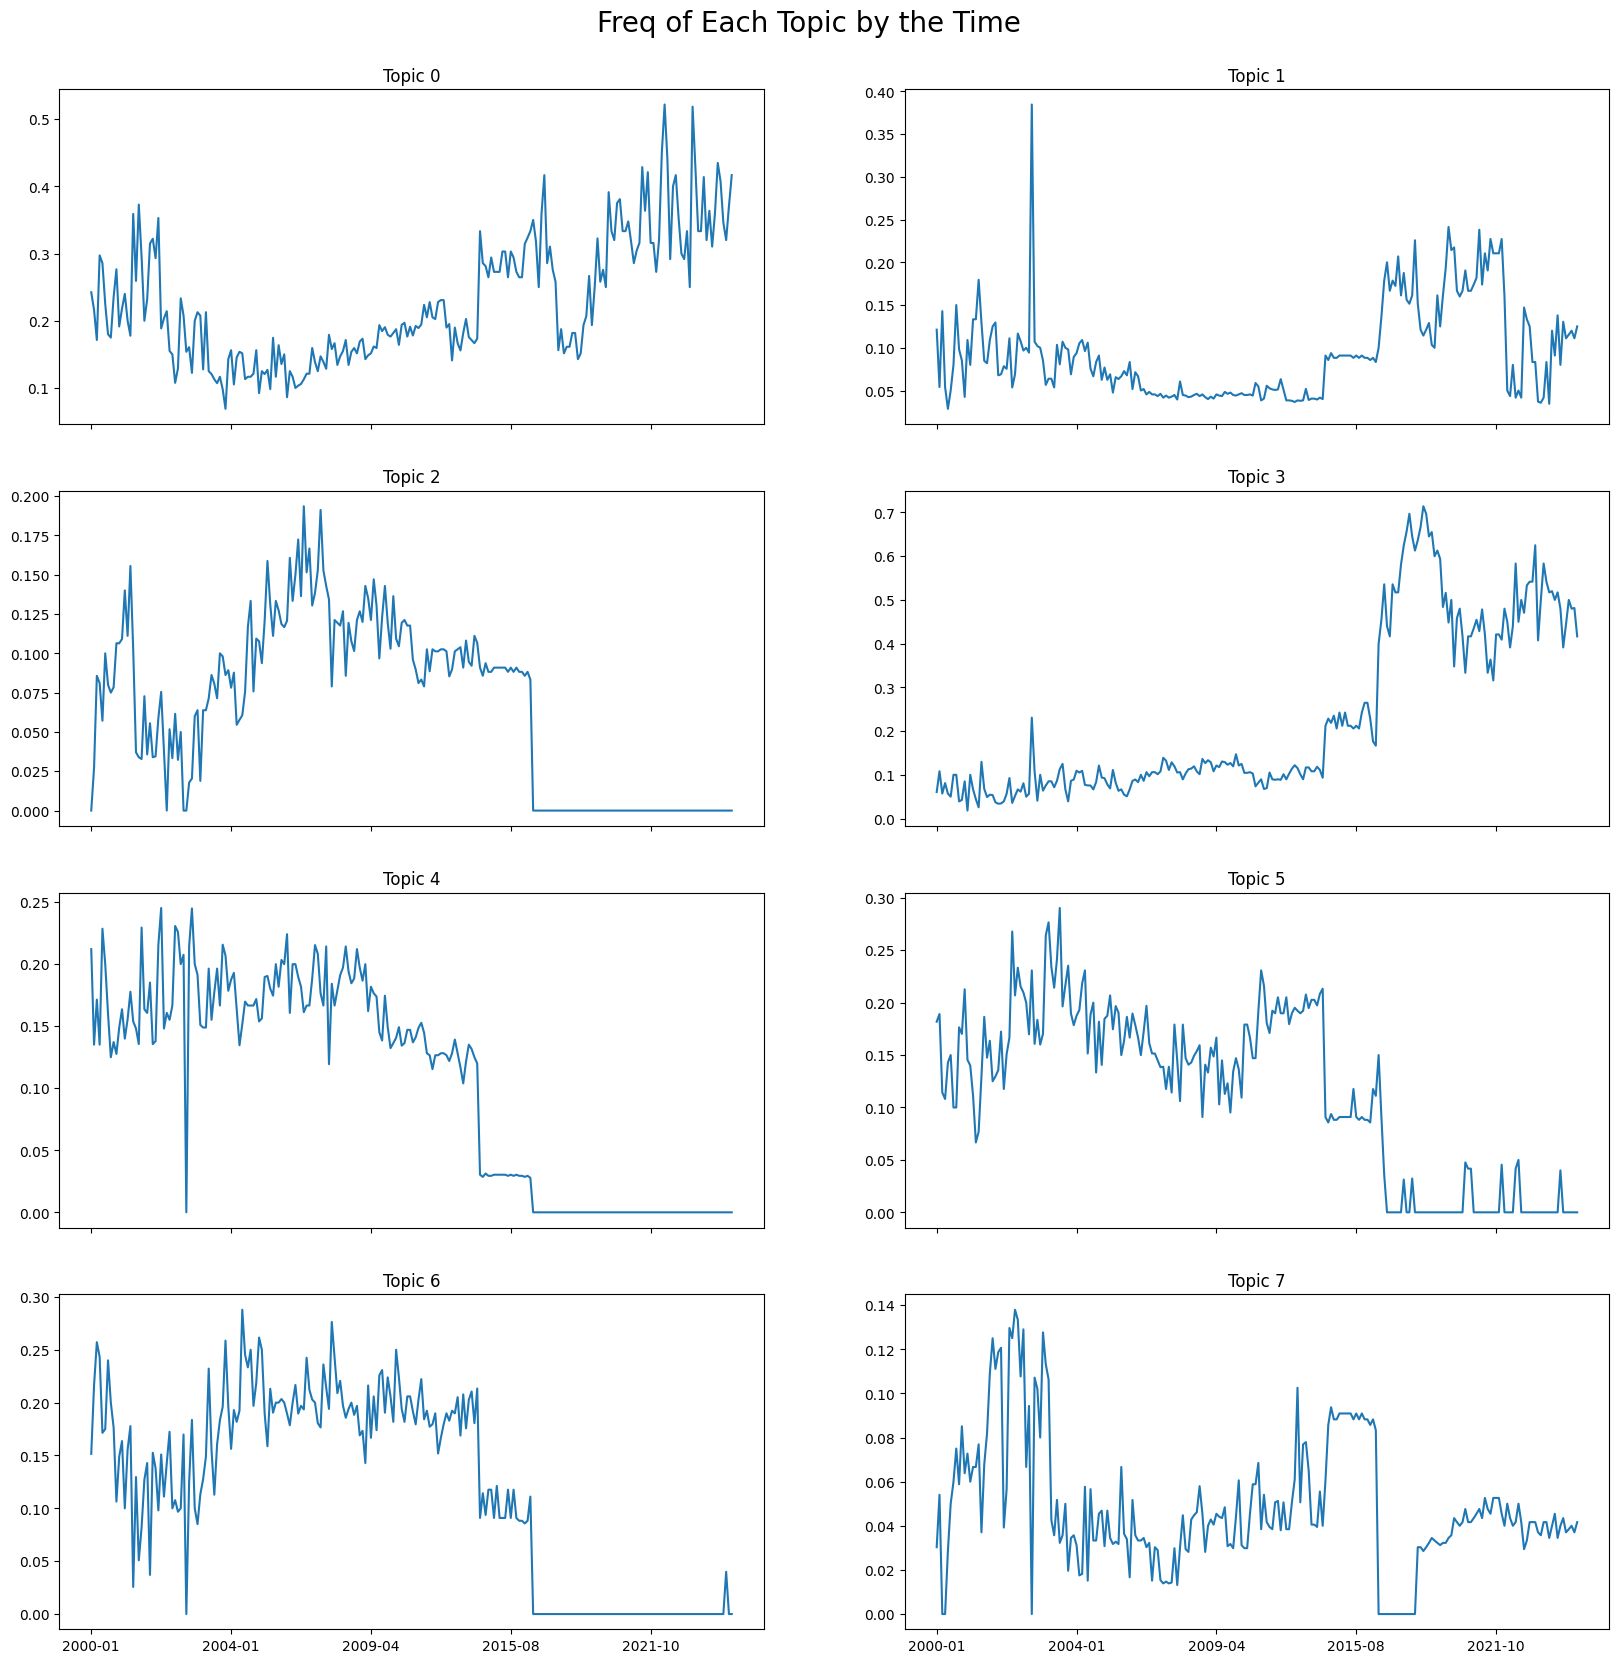

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20), sharex=True)
fig.suptitle('Freq of Each Topic by the Time', fontsize=20, y=0.92)

for i, ax in enumerate(axes.flatten()):
    if i < len(topic_proportions_by_date.columns):
        topic_proportions_by_date[i].plot(ax=ax)
        ax.set_title(f'Topic {i}')
        ax.set_xlabel('')

plt.show()